# 01. Import Library

In [1]:
import numpy as np 
import pandas as pd

import pickle
import gzip

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import random
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision
import torch.nn.init as init
from torch.autograd import Variable
import datetime
from models.recurrent_models_pyramid import LSTMGenerator, LSTMDiscriminator
from torch.utils.data import Dataset, TensorDataset

In [3]:
from __future__ import print_function

import matplotlib

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import argparse
import anogan

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
import pandas as pd

import pickle
import gzip

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# 02. Load Dataset

In [5]:
# Read Numpy
dt_normal = np.load('./Dataset/normal.npy')
dt_abnormal = np.load('./Dataset/abnormal.npy')

In [6]:
# Convert Dataframe
df_normal = pd.DataFrame(dt_normal) 
df_abnormal = pd.DataFrame(dt_abnormal)

In [7]:
df_normal.head(2) # Label(Normal, Abnormal), Class(12 Category), Index, Length = 128*2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,0.0,2.0,35000.0,-0.004816,-0.006052,-0.005916,-0.006077,-0.006557,-0.007216,-0.007161,...,-0.007960,-0.007598,-0.008030,-0.007337,-0.007486,-0.006979,-0.007388,-0.006616,-0.007071,-0.007093
1,0.0,2.0,35001.0,-0.006486,-0.006569,-0.007727,-0.007598,-0.007588,-0.007782,-0.007706,...,0.001992,0.001270,0.001292,0.001445,0.001859,0.001802,0.002545,0.002661,0.002722,0.003453


In [8]:
df_abnormal.head(2) # Label(Normal, Abnormal), Class(12 Category), Index, Length = 128*2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,1.0,2.0,35000.0,-0.020719,-0.004545,-0.039055,0.008879,-0.006233,-0.023848,-0.028195,...,0.006028,-0.053692,-0.041416,0.000348,0.021073,-0.025384,-0.021806,0.006937,-0.003185,-0.003866
1,1.0,2.0,35001.0,-0.000004,0.027787,-0.000187,-0.008605,0.016682,0.006072,-0.004242,...,-0.011645,-0.007153,-0.007864,0.039845,0.024516,-0.003008,0.009302,0.003998,-0.015586,0.005336


# 03. Split Train & Valid & Test Dataset

In [10]:
# Data shuffling

In [11]:
# Normal Numpy
np.random.seed(0)
idx = np.arange(dt_normal.shape[0])
np.random.shuffle(idx)

In [12]:
dt_normal = dt_normal[idx, :]

In [13]:
# Abnormal Numpy
np.random.seed(0)
idx = np.arange(dt_abnormal.shape[0])
np.random.shuffle(idx)

In [14]:
dt_abnormal = dt_abnormal[idx,]

In [15]:
# Convert Dataframe

In [16]:
df_normal = pd.DataFrame(dt_normal) 
df_abnormal = pd.DataFrame(dt_abnormal)

In [17]:
df_normal.head(2) # Label(Normal, Abnormal), Class(12 Category), Index, Length = 128*2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,0.0,2.0,122230.0,-0.006888,-0.006999,-0.007373,-0.007495,-0.007454,-0.007383,-0.007537,...,-0.001368,-0.002286,-0.002543,-0.003286,-0.003773,-0.004697,-0.005318,-0.005913,-0.006028,-0.006703
1,0.0,2.0,35668.0,-0.000977,-0.001300,-0.001350,-0.001318,-0.001400,-0.000820,0.000034,...,-0.005466,-0.005961,-0.005688,-0.006068,-0.005967,-0.006503,-0.006147,-0.005821,-0.005349,-0.004882


In [18]:
df_abnormal.head(2) # Label(Normal, Abnormal), Class(12 Category), Index, Length = 128*2

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,1.0,2.0,122230.0,0.023590,0.012840,0.006710,0.033408,0.010306,-0.013167,-0.020665,...,-0.023469,0.025580,0.011129,-0.026014,0.021270,-0.003884,-0.049025,-0.022155,0.017381,0.016125
1,1.0,2.0,35668.0,-0.014786,-0.003845,-0.038814,-0.001000,-0.025414,-0.000059,-0.016924,...,0.005612,-0.015843,-0.004621,-0.032007,-0.013144,0.022103,0.010985,-0.034641,0.000995,-0.014168


In [19]:
# train(normal) 3800, valid(normal) 200, test(abnormal) 400

In [20]:
# Normal Numpy 성분 분리
normal_y = dt_normal[:, 0]
normal_cls = dt_normal[:, 1]
normal_idx = dt_normal[:, 2]
normal_X = dt_normal[:, 3:]

In [21]:
X_train = normal_X[:3800, :]
y_train = normal_y[:3800] # Train Dataset

In [22]:
X_valid = normal_X[3800:4000, :]
y_valid = normal_y[3800:4000] # Valid Dataset ratio 5%(200)

In [23]:
# Abnormal Numpy (Split Columns)
abnormal_y = dt_abnormal[:, 0]
abnormal_cls = dt_abnormal[:, 1]
abnormal_idx = dt_abnormal[:, 2]
abnormal_X = dt_abnormal[:, 3:]

In [24]:
X_test = abnormal_X[:400, :]
y_test = abnormal_y[:400]

In [25]:
# Train Dataset Augmentation Code
X_train = np.vstack([X_train, X_train])
y_train = np.hstack([y_train, y_train])

In [26]:
print(X_train.shape)
print(y_train.shape)
##############################
print(X_valid.shape)
print(y_valid.shape)
##############################
print(X_test.shape)
print(y_test.shape)

(7600, 256)
(7600,)
(200, 256)
(200,)
(400, 256)
(400,)


# 04. LSTM-based AnoGAN Phase

In [27]:
class ArgsTrn:
    workers=4
    batch_size=8
    epochs=10 # fix epoch 10
    lr=0.0001
    cuda = True
    manualSeed=2
    
opt_trn=ArgsTrn()

In [28]:
torch.manual_seed(opt_trn.manualSeed)
cudnn.benchmark = True

In [29]:
X_train = X_train[:, :60]
X_valid = X_valid[:, :60]
X_test = X_test[:, :60]

In [30]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7600, 60)
(200, 60)
(400, 60)


# 05. Train LSTM-based AnoGAN

In [31]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train = torch.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
train_dataset = TensorDataset(X_train, y_train)

In [32]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=opt_trn.batch_size,
                                         shuffle=True, num_workers=int(opt_trn.workers))

In [33]:
device = torch.device("cuda:0" if opt_trn.cuda else "cpu") # select the device
#device = torch.device("cpu") # select the device
seq_len = 60
in_dim = 1

In [34]:
# Create generator and discriminator models
netD = LSTMDiscriminator(in_dim=in_dim, device=device).to(device)
netG = LSTMGenerator(in_dim=in_dim, out_dim=in_dim, device=device).to(device)

In [35]:
print("|Discriminator Architecture|\n", netD)
print("|Generator Architecture|\n", netG)

|Discriminator Architecture|
 LSTMDiscriminator(
  (lstm): LSTM(1, 100, batch_first=True)
  (linear): Sequential(
    (0): Linear(in_features=100, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
|Generator Architecture|
 LSTMGenerator(
  (lstm0): LSTM(1, 32, batch_first=True)
  (lstm1): LSTM(32, 64, batch_first=True)
  (lstm2): LSTM(64, 128, batch_first=True)
  (linear): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
    (1): Tanh()
  )
)


In [36]:
# Setup loss function
criterion = nn.BCELoss().to(device)

In [37]:
# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr=opt_trn.lr)
optimizerG = optim.Adam(netG.parameters(), lr=opt_trn.lr)

In [38]:
real_label = 1
fake_label = 0

for epoch in range(opt_trn.epochs):
    for i, (x,y) in enumerate(train_dataloader, 0):
        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        #Train with real data
        netD.zero_grad()
        real = x.to(device)
        batch_size, seq_len = real.size(0), real.size(1)
        label = torch.full((batch_size, seq_len, 1), real_label, device=device)

        output,_ = netD.forward(real)
        errD_real = criterion(output, label.float())
        errD_real.backward()
        optimizerD.step()
        D_x = output.mean().item()
        
        #Train with fake data
        noise = Variable(init.normal(torch.Tensor(batch_size,seq_len,in_dim),mean=0,std=0.1)).cuda()
        fake,_ = netG.forward(noise)
        output,_ = netD.forward(fake.detach()) # detach causes gradient is no longer being computed or stored to save memeory
        label.fill_(fake_label)
        errD_fake = criterion(output, label.float())
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
        
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        noise = Variable(init.normal(torch.Tensor(batch_size,seq_len,in_dim),mean=0,std=0.1)).cuda()
        fake,_ = netG.forward(noise)
        label.fill_(real_label) 
        output,_ = netD.forward(fake)
        errG = criterion(output, label.float())
        errG.backward()
        optimizerG.step()
        D_G_z2 = output.mean().item()
        
    print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f' 
          % (epoch, opt_trn.epochs, i, len(train_dataloader),
             errD.item(), errG.item(), D_x, D_G_z1, D_G_z2), end='')
    print()

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.


[0/10][949/950] Loss_D: 1.3472 Loss_G: 0.5019 D(x): 0.6623 D(G(z)): 0.6059 / 0.6061
[1/10][949/950] Loss_D: 1.4948 Loss_G: 0.4279 D(x): 0.6529 D(G(z)): 0.6535 / 0.6534
[2/10][949/950] Loss_D: 1.4962 Loss_G: 0.4241 D(x): 0.6558 D(G(z)): 0.6558 / 0.6557
[3/10][949/950] Loss_D: 1.4975 Loss_G: 0.4215 D(x): 0.6571 D(G(z)): 0.6574 / 0.6572
[4/10][949/950] Loss_D: 1.4981 Loss_G: 0.4186 D(x): 0.6592 D(G(z)): 0.6591 / 0.6589
[5/10][949/950] Loss_D: 1.4997 Loss_G: 0.4159 D(x): 0.6605 D(G(z)): 0.6606 / 0.6604
[6/10][949/950] Loss_D: 1.5061 Loss_G: 0.4087 D(x): 0.6650 D(G(z)): 0.6653 / 0.6651
[7/10][949/950] Loss_D: 1.5010 Loss_G: 0.4127 D(x): 0.6622 D(G(z)): 0.6625 / 0.6623
[8/10][949/950] Loss_D: 1.5059 Loss_G: 0.4070 D(x): 0.6661 D(G(z)): 0.6662 / 0.6660
[9/10][949/950] Loss_D: 1.5017 Loss_G: 0.4105 D(x): 0.6638 D(G(z)): 0.6638 / 0.6636


# 06. Evaluation LSTM-based AnoGAN(Valid Dataset) 

In [39]:
# Evaluate valid & test dataset 

In [40]:
class ArgsTest:
    workers = 1
    batch_size = 1
    
opt_test=ArgsTest() 

In [41]:
generator = netG # changing reference variable 
discriminator = netD # changing reference variable 

In [42]:
# Lambda = 0.1 according to paper
# x is new data, G_z is closely regenerated data

def Anomaly_score(x, G_z, Lambda=0.1):
    residual_loss = torch.sum(torch.abs(x-G_z)) # Residual Loss
    
    # x_feature is a rich intermediate feature representation for real data x
    output, x_feature = discriminator(x.to(device)) 
    # G_z_feature is a rich intermediate feature representation for fake data G(z)
    output, G_z_feature = discriminator(G_z.to(device)) 
    
    discrimination_loss = torch.sum(torch.abs(x_feature-G_z_feature)) # Discrimination loss
    
    total_loss = (1-Lambda)*residual_loss.to(device) + Lambda*discrimination_loss
    return total_loss

In [43]:
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)
X_valid = torch.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
print(X_valid.shape)
print(y_valid.shape)
valid_dataset = TensorDataset(X_valid, y_valid)

torch.Size([200, 60, 1])
torch.Size([200])


In [44]:
# valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=opt_trn.batch_size,
#                                          shuffle=True, num_workers=int(opt_trn.workers))

In [45]:
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=1,
                                         shuffle=True, num_workers=int(opt_trn.workers))

In [46]:
valid_loss_list = []

batch_size = 1
window_length = 60
n_feature = 1

for i, (x,y) in enumerate(valid_dataloader):
    print(i, y)
    
    z = Variable(init.normal(torch.zeros(batch_size,
                                     window_length, 
                                     n_feature),mean=0,std=0.1),requires_grad=True)
    #z = x
    z_optimizer = torch.optim.Adam([z],lr=1e-2)
    
    loss = None
    for j in range(50): # set your interation range
        gen_fake,_ = generator(z.cuda())
        loss = Anomaly_score(Variable(x).cuda(), gen_fake)
        loss.backward()
        z_optimizer.step()

    valid_loss_list.append(loss) # Store the loss from the final iteration
    #y_list.append(y) # Store the corresponding anomaly label
    print('~~~~~~~~loss={},  y={} ~~~~~~~~~~'.format(loss, y))
    #break

0 tensor([0.])


/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  if sys.path[0] == '':


~~~~~~~~loss=0.9225243330001831,  y=tensor([0.]) ~~~~~~~~~~
1 tensor([0.])
~~~~~~~~loss=0.57552170753479,  y=tensor([0.]) ~~~~~~~~~~
2 tensor([0.])
~~~~~~~~loss=0.8687188625335693,  y=tensor([0.]) ~~~~~~~~~~
3 tensor([0.])
~~~~~~~~loss=0.8087247014045715,  y=tensor([0.]) ~~~~~~~~~~
4 tensor([0.])
~~~~~~~~loss=0.19599056243896484,  y=tensor([0.]) ~~~~~~~~~~
5 tensor([0.])
~~~~~~~~loss=0.48307377099990845,  y=tensor([0.]) ~~~~~~~~~~
6 tensor([0.])
~~~~~~~~loss=0.9517717361450195,  y=tensor([0.]) ~~~~~~~~~~
7 tensor([0.])
~~~~~~~~loss=0.2753026485443115,  y=tensor([0.]) ~~~~~~~~~~
8 tensor([0.])
~~~~~~~~loss=0.6666213870048523,  y=tensor([0.]) ~~~~~~~~~~
9 tensor([0.])
~~~~~~~~loss=0.7752081155776978,  y=tensor([0.]) ~~~~~~~~~~
10 tensor([0.])
~~~~~~~~loss=0.2945976257324219,  y=tensor([0.]) ~~~~~~~~~~
11 tensor([0.])
~~~~~~~~loss=0.34096887707710266,  y=tensor([0.]) ~~~~~~~~~~
12 tensor([0.])
~~~~~~~~loss=0.2285623848438263,  y=tensor([0.]) ~~~~~~~~~~
13 tensor([0.])
~~~~~~~~loss=0.59848

<function matplotlib.pyplot.show(*args, **kw)>

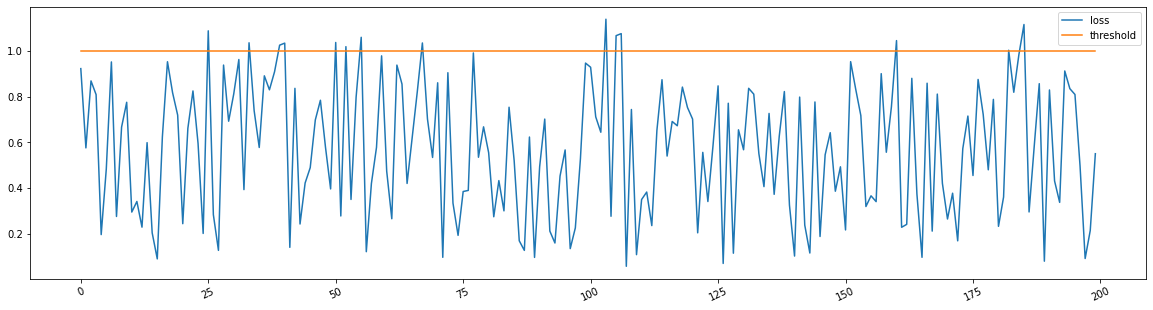

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

Valid_THRESHOLD = 1.0 # Anomaly score threshold for an instance to be considered as anomaly 

#TIME_STEPS = dataset.window_length
valid_score_df = pd.DataFrame(index=range(len(valid_loss_list)))
valid_score_df['loss'] = [loss.item()/batch_size for loss in valid_loss_list]
valid_score_df['y'] = train_dataset.tensors[1][:len(valid_loss_list)]
valid_score_df['threshold'] = Valid_THRESHOLD
valid_score_df['anomaly'] = valid_score_df.loss > valid_score_df.threshold

plt.figure(figsize = (20, 5))
plt.plot(valid_score_df.index, valid_score_df.loss, label='loss')
plt.plot(valid_score_df.index, valid_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()
plt.show

In [176]:
df_normal['lstm_loss'] = pd.Series()
df_normal['lstm_threshold'] = pd.Series()
df_normal['lstm_anomaly'] = pd.Series()

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [177]:
df_normal['lstm_loss'][3800:4000] = valid_score_df['loss']
df_normal['lstm_threshold'][3800:4000] = valid_score_df['threshold']
df_normal['lstm_anomaly'][3800:4000] = valid_score_df['anomaly']

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

# 07. Evaluation LSTM-based AnoGAN(Test Dataset)

In [58]:
class ArgsTest:
    workers = 1
    batch_size = 1
    
opt_test=ArgsTest() 

In [59]:
generator = netG # changing reference variable 
discriminator = netD # changing reference variable 

In [60]:
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test = torch.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(y_test.shape)
test_dataset = TensorDataset(X_test, y_test)

torch.Size([400, 60, 1])
torch.Size([400])


In [61]:
# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=opt_trn.batch_size,
#                                          shuffle=True, num_workers=int(opt_trn.workers))

In [62]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                         shuffle=True, num_workers=int(opt_trn.workers))

In [63]:
test_loss_list = []
#y_list = []

batch_size = 1
window_length = 60
n_feature = 1

for i, (x,y) in enumerate(test_dataloader):
    print(i, y)
    
    z = Variable(init.normal(torch.zeros(batch_size,
                                     window_length, 
                                     n_feature),mean=0,std=0.1),requires_grad=True)
    #z = x
    z_optimizer = torch.optim.Adam([z],lr=1e-2)
    
    loss = None
    for j in range(50): # set your interation range
        gen_fake,_ = generator(z.cuda())
        loss = Anomaly_score(Variable(x).cuda(), gen_fake)
        loss.backward()
        z_optimizer.step()

    test_loss_list.append(loss) # Store the loss from the final iteration
    #y_list.append(y) # Store the corresponding anomaly label
    print('~~~~~~~~loss={},  y={} ~~~~~~~~~~'.format(loss, y))
    #break

0 tensor([1.])


/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  del sys.path[0]


~~~~~~~~loss=1.5953378677368164,  y=tensor([1.]) ~~~~~~~~~~
1 tensor([1.])
~~~~~~~~loss=1.2791467905044556,  y=tensor([1.]) ~~~~~~~~~~
2 tensor([1.])
~~~~~~~~loss=1.2347404956817627,  y=tensor([1.]) ~~~~~~~~~~
3 tensor([1.])
~~~~~~~~loss=1.466424822807312,  y=tensor([1.]) ~~~~~~~~~~
4 tensor([1.])
~~~~~~~~loss=1.1232653856277466,  y=tensor([1.]) ~~~~~~~~~~
5 tensor([1.])
~~~~~~~~loss=1.2928897142410278,  y=tensor([1.]) ~~~~~~~~~~
6 tensor([1.])
~~~~~~~~loss=0.9676833152770996,  y=tensor([1.]) ~~~~~~~~~~
7 tensor([1.])
~~~~~~~~loss=1.1432992219924927,  y=tensor([1.]) ~~~~~~~~~~
8 tensor([1.])
~~~~~~~~loss=1.4252516031265259,  y=tensor([1.]) ~~~~~~~~~~
9 tensor([1.])
~~~~~~~~loss=1.030395269393921,  y=tensor([1.]) ~~~~~~~~~~
10 tensor([1.])
~~~~~~~~loss=1.5005751848220825,  y=tensor([1.]) ~~~~~~~~~~
11 tensor([1.])
~~~~~~~~loss=1.3527297973632812,  y=tensor([1.]) ~~~~~~~~~~
12 tensor([1.])
~~~~~~~~loss=1.1285488605499268,  y=tensor([1.]) ~~~~~~~~~~
13 tensor([1.])
~~~~~~~~loss=1.57411015

<function matplotlib.pyplot.show(*args, **kw)>

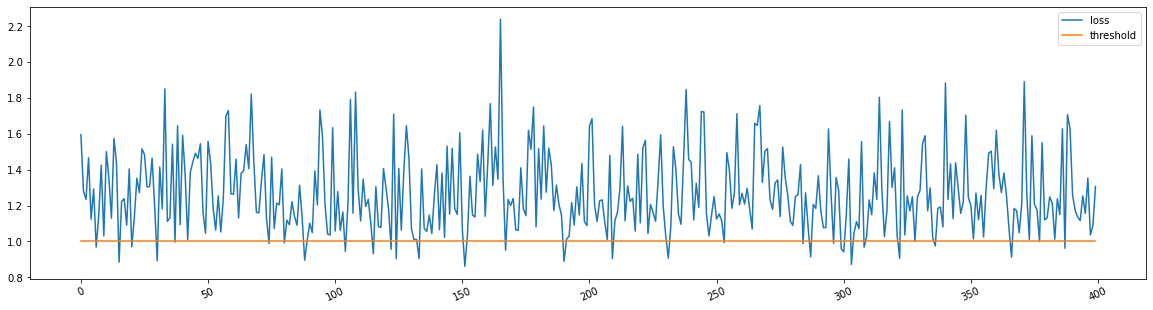

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

Test_THRESHOLD = 1.0 # Anomaly score threshold for an instance to be considered as anomaly 

#TIME_STEPS = dataset.window_length
test_score_df = pd.DataFrame(index=range(len(test_loss_list)))
test_score_df['loss'] = [loss.item()/batch_size for loss in test_loss_list]
test_score_df['y'] = test_dataset.tensors[1][:len(test_loss_list)]
test_score_df['threshold'] = Test_THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

plt.figure(figsize = (20, 5))
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')

plt.xticks(rotation=25)
plt.legend()
plt.show

In [179]:
df_abnormal['lstm_loss'] = pd.Series()
df_abnormal['lstm_threshold'] = pd.Series()
df_abnormal['lstm_anomaly'] = pd.Series()

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
df_abnormal['lstm_loss'][:400] = test_score_df['loss']
df_abnormal['lstm_threshold'][:400] = test_score_df['threshold']
df_abnormal['lstm_anomaly'][:400] = test_score_df['anomaly']

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

# 08. Train CNN-based AnoGAN

In [70]:
def scatter_plot(list):
    x = []
    y = []
    for i in list:
        x.append(i[0]*27)
        y.append(i[1]*27)

    x = np.around(x)
    y = np.around(y)
    
    temp_list = [0]*784
    
    for i in range(128):
        temp_list[(int(y[i]))*28+(int(x[i]))] = 255 # Grayscale
    
    #plt.scatter(x,y)
    #plt.show()
    
    temp_arr = np.array(temp_list)
    return temp_arr

In [71]:
X_train_image = normal_X[:3800, :]
y_train_image = normal_y[:3800] # Train Dataset 

In [72]:
X_valid_image = normal_X[3800:4000, :]
y_valid_image = normal_y[3800:4000] # Validation Dataset 비율 5% (200개)

In [73]:
X_test_image = abnormal_X[:400, :]
y_test_image = abnormal_y[:400]

# 09. Prepare Train Dataset for CNN-based AnoGAN

In [74]:
emtpy_arr = np.zeros((0, 784))

for i in range(X_train_image.shape[0]):

    scaler = MinMaxScaler()
    temp_list = list(zip(X_train_image[i][:128].tolist(), X_train_image[i][128:256].tolist()))
    scaler.fit(temp_list)
    result_list = scaler.transform(temp_list)
    add_list = scatter_plot(result_list)
    emtpy_arr = np.vstack((emtpy_arr, add_list))

X_train_image_pre = emtpy_arr

# 10. Prepare Valid Dataset for CNN-based AnoGAN

In [75]:
emtpy_arr = np.zeros((0, 784))

for i in range(X_valid_image.shape[0]):

    scaler = MinMaxScaler()
    temp_list = list(zip(X_valid_image[i][:128].tolist(), X_valid_image[i][128:256].tolist()))
    scaler.fit(temp_list)
    result_list = scaler.transform(temp_list)
    add_list = scatter_plot(result_list)
    emtpy_arr = np.vstack((emtpy_arr, add_list))

X_valid_image_pre = emtpy_arr

# 11. Prepare Test Dataset for CNN-based AnoGAN

In [76]:
emtpy_arr = np.zeros((0, 784))

for i in range(X_test_image.shape[0]):

    scaler = MinMaxScaler()
    temp_list = list(zip(X_test_image[i][:128].tolist(), X_test_image[i][128:256].tolist()))
    scaler.fit(temp_list)
    result_list = scaler.transform(temp_list)
    add_list = scatter_plot(result_list)
    emtpy_arr = np.vstack((emtpy_arr, add_list))

X_test_image_pre = emtpy_arr

In [77]:
print(X_train_image_pre.shape)
print(X_valid_image_pre.shape)
print(X_test_image_pre.shape)

(3800, 784)
(200, 784)
(400, 784)


# 12. Reshape Image Dataset

In [78]:
X_train_image_2d = X_train_image_pre.reshape((X_train_image_pre.shape[0], 28, 28))
y_train_image = np.full(X_train_image_pre.shape[0], 0) # Normal

X_valid_image_2d = X_valid_image_pre.reshape((X_valid_image_pre.shape[0], 28, 28))
y_valid_image = np.full(X_valid_image_pre.shape[0], 0) # Normal

X_test_image_2d = X_test_image_pre.reshape((X_test_image_pre.shape[0], 28, 28))
y_test_image = np.full(X_test_image_pre.shape[0], 1) # Abnormal

In [79]:
print(X_train_image_2d.shape)
print(X_valid_image_2d.shape)
print(X_test_image_2d.shape)

(3800, 28, 28)
(200, 28, 28)
(400, 28, 28)


In [80]:
print(y_train_image.shape)
print(y_valid_image.shape)
print(y_test_image.shape)

(3800,)
(200,)
(400,)


In [81]:
n = 5
total_train = np.zeros((0, 28, 28))

for i in range(n): # Stacking
    total_train = np.vstack((total_train, X_train_image_2d))

y_train_image = np.full(X_train_image_2d.shape[0]*n, 0)
X_train_image_2d = total_train

In [82]:
# Normalization
X_train_image_2d = (X_train_image_2d.astype(np.float32) - 127.5) / 127.5
X_valid_image_2d = (X_valid_image_2d.astype(np.float32) - 127.5) / 127.5
X_test_image_2d = (X_test_image_2d.astype(np.float32) - 127.5) / 127.5

X_train_image_2d = X_train_image_2d[:,:,:,None]
X_valid_image_2d = X_valid_image_2d[:,:,:,None]
X_test_image_2d = X_test_image_2d[:,:,:,None]

X_train_original = X_train_image_2d.copy()
X_valid_original = X_valid_image_2d.copy() 
X_test_original = X_test_image_2d.copy() 

print ('train shape:', X_train_original.shape)
print ('valid shape:', X_valid_original.shape)
print ('test shape:', X_test_original.shape)

train shape: (19000, 28, 28, 1)
valid shape: (200, 28, 28, 1)
test shape: (400, 28, 28, 1)


In [83]:
Model_d, Model_g = anogan.train(64, X_train_image_2d, 0.0004, 0.0002)

Epoch is 0
295/296 [============================>.] - ETA: 0s - g: 0.5520 - d: 0.2682
Epoch is 1
295/296 [============================>.] - ETA: 0s - g: 0.9834 - d: 0.4989
Epoch is 2
295/296 [============================>.] - ETA: 0s - g: 0.5554 - d: 0.1951
Epoch is 3
295/296 [============================>.] - ETA: 0s - g: 0.3494 - d: 0.1347
Epoch is 4
295/296 [============================>.] - ETA: 0s - g: 0.3287 - d: 0.1362
Epoch is 5
295/296 [============================>.] - ETA: 0s - g: 0.1730 - d: 0.0943
Epoch is 6
295/296 [============================>.] - ETA: 0s - g: 0.3392 - d: 0.0991
Epoch is 7
295/296 [============================>.] - ETA: 0s - g: 0.2684 - d: 0.0931
Epoch is 8
295/296 [============================>.] - ETA: 0s - g: 0.3424 - d: 0.0661
Epoch is 9
295/296 [============================>.] - ETA: 0s - g: 0.3291 - d: 0.0625


# 06. Generate Fake Dataset

In [84]:
generated_img = anogan.generate(25)
img = anogan.combine_images(generated_img)
img = (img*127.5)+127.5
img = img.astype(np.uint8)
img = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)

1/1 [==============================] - 0s 108ms/step


In [85]:
def anomaly_detection(test_img, g=None, d=None):
    model = anogan.anomaly_detector(g=g, d=d)
    ano_score, similar_img = anogan.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1), iterations=500, d=d)

    # anomaly area, 255 normalization
    np_residual = test_img.reshape(28,28,1) - similar_img.reshape(28,28,1)
    np_residual = (np_residual + 2)/4

    np_residual = (255*np_residual).astype(np.uint8)
    original_x = (test_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)
    similar_x = (similar_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)

    original_x_color = cv2.cvtColor(original_x, cv2.COLOR_GRAY2BGR)

    residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)

    show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    return ano_score, original_x, similar_x, show

# 07. Evaluate Test Dataset(Abnormal)

In [86]:
X_test_original.shape

(400, 28, 28, 1)

In [87]:
test_score = []
for i in range(X_test_original.shape[0]):
    ### compute anomaly score - sample from strange image
    img_idx = i #args.img_idx
    label_idx = 1 #args.label_idx

    #train_img = X_train_original[y_train==label_idx][img_idx]
    test_img = X_test_original[y_test_image==label_idx][img_idx]

    start = cv2.getTickCount()
    score, qurey, pred, diff = anomaly_detection(test_img)
    
    
    time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
    print ('%d label, %d : done'%(label_idx, img_idx), '%.2f'%score, '%.2fms'%time)
    test_score.append(score)

1/1 [==============================] - 0s 37ms/step


/home/dxlab/anaconda3/lib/python3.7/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


1/1 [==============================] - 0s 98ms/step
1 label, 0 : done 388.74 2701.19ms
1/1 [==============================] - 0s 100ms/step
1 label, 1 : done 392.26 2665.29ms
1/1 [==============================] - 0s 103ms/step
1 label, 2 : done 373.82 3078.85ms
1/1 [==============================] - 0s 101ms/step
1 label, 3 : done 390.11 2662.65ms
1/1 [==============================] - 0s 108ms/step
1 label, 4 : done 348.66 2636.59ms
1/1 [==============================] - 0s 101ms/step
1 label, 5 : done 373.83 2599.29ms
1/1 [==============================] - 0s 99ms/step
1 label, 6 : done 373.92 2606.87ms
1/1 [==============================] - 0s 103ms/step
1 label, 7 : done 378.74 2625.54ms
1/1 [==============================] - 0s 99ms/step
1 label, 8 : done 403.81 2616.42ms
1/1 [==============================] - 0s 104ms/step
1 label, 9 : done 350.90 3141.04ms
1/1 [==============================] - 0s 102ms/step
1 label, 10 : done 334.44 2630.30ms
1/1 [=============================

In [128]:
Test_image_THRESHOLD = 340
test_image_score_df = pd.DataFrame(index=range(len(test_score)))
test_image_score_df['loss'] = test_score
test_image_score_df['threshold'] = Test_image_THRESHOLD
test_image_score_df['anomaly'] = test_image_score_df.loss > test_image_score_df.threshold

<function matplotlib.pyplot.show(*args, **kw)>

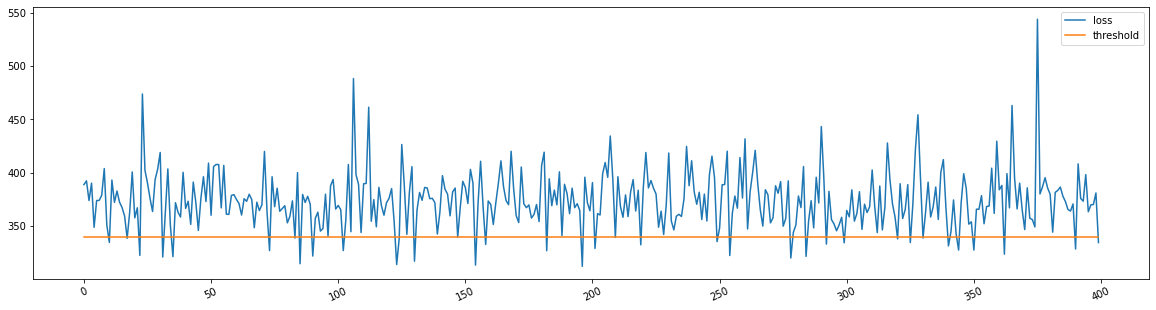

In [129]:
plt.figure(figsize = (20, 5))
plt.plot(test_image_score_df.index, test_image_score_df.loss, label='loss')
plt.plot(test_image_score_df.index, test_image_score_df.threshold, label='threshold')

plt.xticks(rotation=25)
plt.legend()
plt.show

In [130]:
df_abnormal['cnn_loss'] = pd.Series()
df_abnormal['cnn_threshold'] = pd.Series()
df_abnormal['cnn_anomaly'] = pd.Series()

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
df_abnormal['cnn_loss'][:400] = test_image_score_df['loss']
df_abnormal['cnn_threshold'][:400] = test_image_score_df['threshold']
df_abnormal['cnn_anomaly'][:400] = test_image_score_df['anomaly']

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

# 08. Evaluate Valid Dataset(Normal)

In [96]:
X_valid.shape

torch.Size([200, 60, 1])

In [97]:
valid_score = []
for i in range(X_valid_original.shape[0]):
    # compute anomaly score - sample from strange image
    img_idx = i #args.img_idx
    label_idx = 0 #args.label_idx

    #train_img = X_train_original[y_train==label_idx][img_idx]
    valid_img = X_valid_original[y_valid_image==label_idx][img_idx]

    start = cv2.getTickCount()
    score, qurey, pred, diff = anomaly_detection(valid_img)
    time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
    print ('%d label, %d : done'%(label_idx, img_idx), '%.2f'%score, '%.2fms'%time)
    valid_score.append(score)

1/1 [==============================] - 0s 45ms/step


/home/dxlab/anaconda3/lib/python3.7/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


1/1 [==============================] - 0s 132ms/step
0 label, 0 : done 237.93 2833.81ms
1/1 [==============================] - 0s 112ms/step
0 label, 1 : done 281.39 2757.72ms
1/1 [==============================] - 0s 105ms/step
0 label, 2 : done 142.42 2668.20ms
1/1 [==============================] - 0s 102ms/step
0 label, 3 : done 156.11 2643.18ms
1/1 [==============================] - 0s 102ms/step
0 label, 4 : done 210.52 2715.55ms
1/1 [==============================] - 0s 100ms/step
0 label, 5 : done 174.67 2662.80ms
1/1 [==============================] - 0s 161ms/step
0 label, 6 : done 186.94 3546.24ms
1/1 [==============================] - 0s 123ms/step
0 label, 7 : done 242.34 2813.82ms
1/1 [==============================] - 0s 105ms/step
0 label, 8 : done 209.51 2693.10ms
1/1 [==============================] - 0s 103ms/step
0 label, 9 : done 175.05 2698.05ms
1/1 [==============================] - 0s 102ms/step
0 label, 10 : done 185.30 2670.88ms
1/1 [==========================

In [132]:
Valid_image_THRESHOLD = 340
valid_image_score_df = pd.DataFrame(index=range(len(valid_score)))
valid_image_score_df['loss'] = valid_score
valid_image_score_df['threshold'] = Valid_image_THRESHOLD
valid_image_score_df['anomaly'] = valid_image_score_df.loss > valid_image_score_df.threshold

In [133]:
df_normal['cnn_loss'] = pd.Series()
df_normal['cnn_threshold'] = pd.Series()
df_normal['cnn_anomaly'] = pd.Series()

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
df_normal['cnn_loss'][3800:4000] = valid_image_score_df['loss']
df_normal['cnn_threshold'][3800:4000] = valid_image_score_df['threshold']
df_normal['cnn_anomaly'][3800:4000] = valid_image_score_df['anomaly']

/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dxlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the i

In [181]:
total_normal = 200
normal_count = 0
for i in range(3800, 4000):
    flag = False
    rand_stat = random.randint(0, 1)
    
    if (df_normal.iloc[i]['lstm_anomaly'] == False and df_normal.iloc[i]['cnn_anomaly'] == False):
        normal_count += 1
    else:
        if (rand_stat == 0):
            if (df_normal.iloc[i]['lstm_anomaly'] == False):
                normal_count += 1
        else:
            if (df_normal.iloc[i]['cnn_anomaly'] == False):
                normal_count += 1

total_abnormal = 400
abnormal_count = 0
for i in range(0, 400):
    flag = True
    rand_stat = random.randint(0, 1)
    
    if (df_abnormal.iloc[i]['lstm_anomaly'] == True and df_abnormal.iloc[i]['cnn_anomaly'] == True):
        abnormal_count += 1
    else:
        if (rand_stat == 0):
            if (df_abnormal.iloc[i]['lstm_anomaly'] == True):
                abnormal_count += 1
        else:
            if (df_abnormal.iloc[i]['cnn_anomaly'] == True):
                abnormal_count += 1

In [191]:
#recall
print('recall : ', (abnormal_count/total_abnormal)*100, '%')

recall :  91.5 %
